# importing all libraries required for this project


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Importing data 

In [3]:
df=pd.read_csv("Iris _for decision tree.csv")
print('Your Data is Ready ')

Your Data is Ready 


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Converting catogrical into numerical data by using lebele encoder 

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
labelencoder = LabelEncoder()
df['Species'] = labelencoder.fit_transform(df['Species'])

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,2
141,142,6.9,3.1,5.1,2.3,2
142,143,5.8,2.7,5.1,1.9,2
143,144,6.8,3.2,5.9,2.3,2
144,145,6.7,3.3,5.7,2.5,2
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [10]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [15]:

df.shape


(150, 6)

rename the name of name of column

In [16]:
df['target'] = df['Species']

In [17]:
df=df.drop(['Species'],axis=1)

In [18]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
140,141,6.7,3.1,5.6,2.4,2
141,142,6.9,3.1,5.1,2.3,2
142,143,5.8,2.7,5.1,1.9,2
143,144,6.8,3.2,5.9,2.3,2
144,145,6.7,3.3,5.7,2.5,2
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


# let's visualize the data 

scatter plot between petalwidth Vs petal length

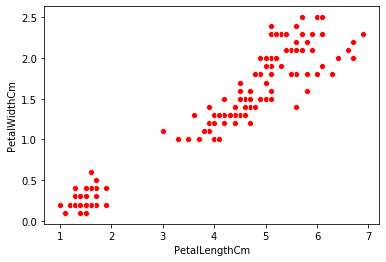

In [19]:
sns.scatterplot(y= 'PetalWidthCm', x= 'PetalLengthCm', data=df,color='red')

catter plot between SepalLength Vs Sepalwidth

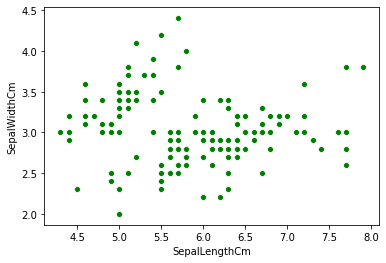

In [20]:
sns.scatterplot(x= 'SepalLengthCm', y= 'SepalWidthCm', data=df,color='green')

In [21]:
df.isnull().sum()      #checking for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
target           0
dtype: int64

In [22]:
X = df.drop('target',axis=1)
y = df['target']


# splitting data into training and test sets

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


# Training our model

In [25]:

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# prediction

In [26]:
predictions = dtree.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         9

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



# Confusion matrix

[[14  1  0]
 [ 0  6  0]
 [ 0  0  9]]


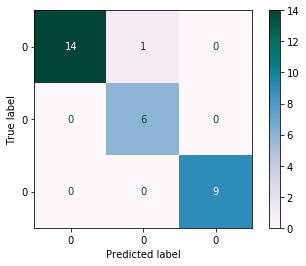

In [28]:
print(confusion_matrix(y_test,predictions))
from sklearn.metrics import plot_confusion_matrix


disp = plot_confusion_matrix(dtree, X_test, y_test,display_labels=df.target,cmap=plt.cm.PuBuGn)
plt.show()

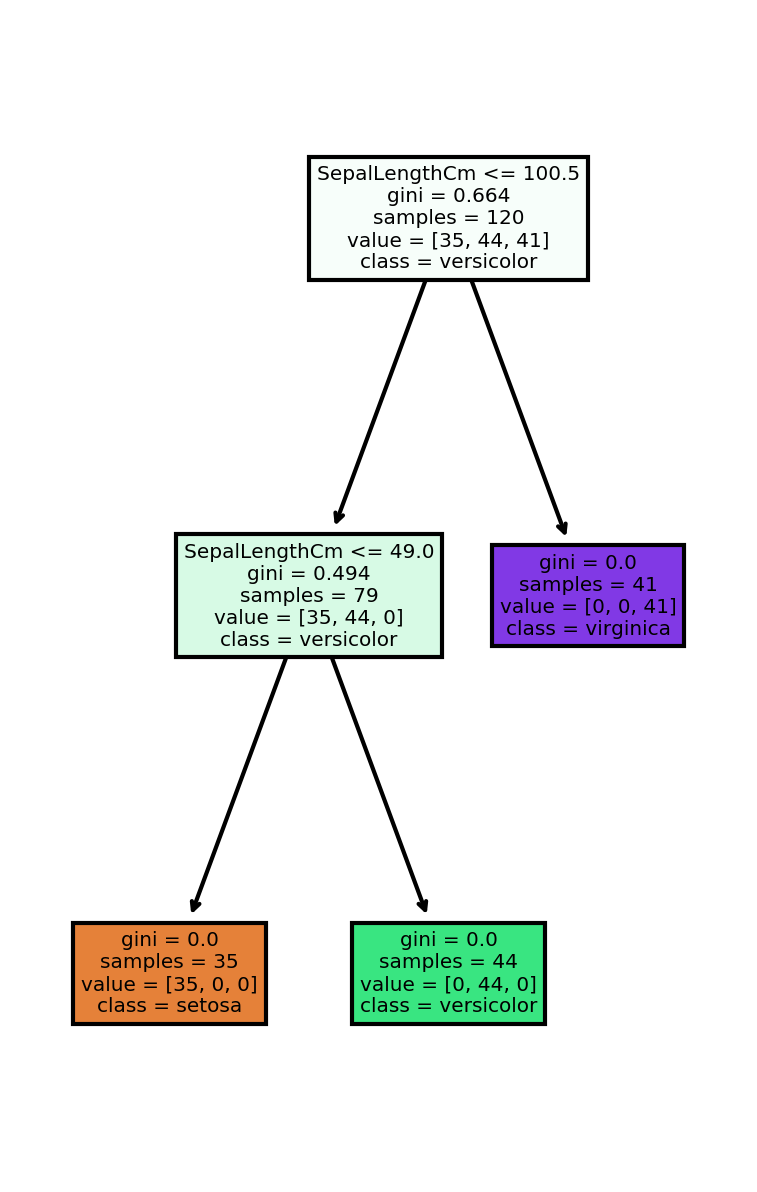

In [31]:
from sklearn import tree
feat_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,5), dpi=300)
tree.plot_tree(dtree,feature_names = feat_names,class_names=classes,filled = True);